In [2]:
library(dplyr)
library(ggplot2)
library(tidyr)
library(ggbeeswarm)
library(Hmisc)
library(RColorBrewer)
library(jgplot2)
library(stringr)
library(extrafont)
loadfonts(device = "pdf")
if(any(grepl("package:plyr", search()))) detach("package:plyr")

In [3]:
theme_set(theme_classic() + 
          theme(#axis.line.x = element_line(size = 0.5),axis.line.y = element_line(size = 0.5),
                axis.title.x = element_text(hjust=-0.3, vjust = 16, size = rel(11/14)),
                axis.title.y = element_text(size = rel(11/14))
                , legend.position = "bottom",
                strip.background = element_blank(), strip.placement = "outside"
              ,strip.text.x = element_text(vjust = 2)
              , axis.ticks.y = element_line(color = "black") 
                , axis.ticks.x = element_blank(), panel.spacing.x = unit(0, "null")
               ,plot.title = element_text(hjust = 0.5, size = rel((9/11)*(11/12)))
         ,axis.text.x = element_text(colour = "black", size = rel(1))
          ,axis.text.y = element_text(colour = "black", size = rel(1))
               ,text = element_text(family="ArialMT", size = 11)
          ,plot.margin = margin(0.1, 0, -0.25, 0, "in"),
              plot.background = element_rect(fill='transparent', color=NA),
              panel.background = element_rect(fill='transparent', color=NA),
              rect = element_rect(fill = "transparent")
         ))

In [4]:
colors <- c(brewer.pal(n = 3, name = "Set1")[c(1,2)])
names(colors) <- c("1", "2")
colors[['3']] <- "lightgrey"
colors[['4']] <- "lightgrey"
colors <- colors[as.character(1:4)]

In [5]:
summary_all <- read.delim("data/CRISPResso_summary.txt")
summary_all <- gather(summary_all[,1:3], key = "Edit_Type", value = "Percent", -Batch)
summary_all$rep <- gsub("_.*", "", summary_all$Batch)
summary_all$type <-  str_to_title(gsub("_.*", "", sub("[A-Za-z0-9]*_[A-Za-z0-9]*_", "", summary_all$Batch)))
summary_all$locus <- toupper(gsub("_.*", "", gsub("REP[1-3]_", "", summary_all$Batch)))
summary_all$insert <- gsub("_.*", "", sub("[A-Za-z0-9]*_[A-Za-z0-9]*_[A-Za-z0-9]*_", "", summary_all$Batch))
summary_all$insert <- ifelse(summary_all$insert == 'GCTGC', "BC1", 
                             ifelse(summary_all$insert == 'GTCAG', "BC2", summary_all$insert))
summary_all$HR <- gsub("rt", "", gsub(".*_", "", summary_all$Batch))
summary_all$HR <- factor(summary_all$HR, levels = sort(as.numeric(unique(summary_all$HR))))
summary_all$color <- as.character(as.numeric(as.factor(paste0(summary_all$Edit_Type, summary_all$insert))))
summary_all$color <- factor(summary_all$color, levels= c('1','3','2','4'))
summary_all$locus <- factor(summary_all$locus, levels = c("RNF2", "HEK3", "EMX1", "RUNX1", "AAVS1", "FANCF"))
summary_all <- summary_all[order(summary_all$locus, summary_all$type, summary_all$HR),]

In [6]:
plot_results_by_type_one_locus <- function(summary_all, locus) {
    ggplot(summary_all[summary_all$locus == locus,], aes(x = HR,y = Percent, fill = color)) + 
    geom_bar(stat = "summary", fun = "mean",position = position_dodge(width = 0.9)
             , color = "black", size=0.25, width = 0.8) + 
    stat_summary(fun.data = "mean_sdl", fun.args = list(mult = 1), geom = "errorbar"
                 , position = position_dodge(width = 0.9), width = 0.4, size = 0.25) + 
    geom_beeswarm(dodge.width = 0.9, size = 1, cex = 1, show.legend = FALSE) + 
    facet_grid(cols = vars(type), scales = "free", space='free'#, switch="x"
              ) +
    xlab("RT Length") +
    scale_fill_manual(values = colors, 
                      labels = c("+GCTGC insertion", "+GTCAG insertion","Indels",  "Indels"), name = "", 
                      breaks=c("1","2", "3", "5")
                      ) +
    ylab("Total sequencing reads with\nspecified edit or indels (%)") + 
    ggtitle(locus) + 
    scale_x_discrete(expand=expansion(add=0.75)) +
    scale_y_continuous(breaks=seq(0,80,by = 10), limits=c(0, 80), expand = c(0, 0))
}

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


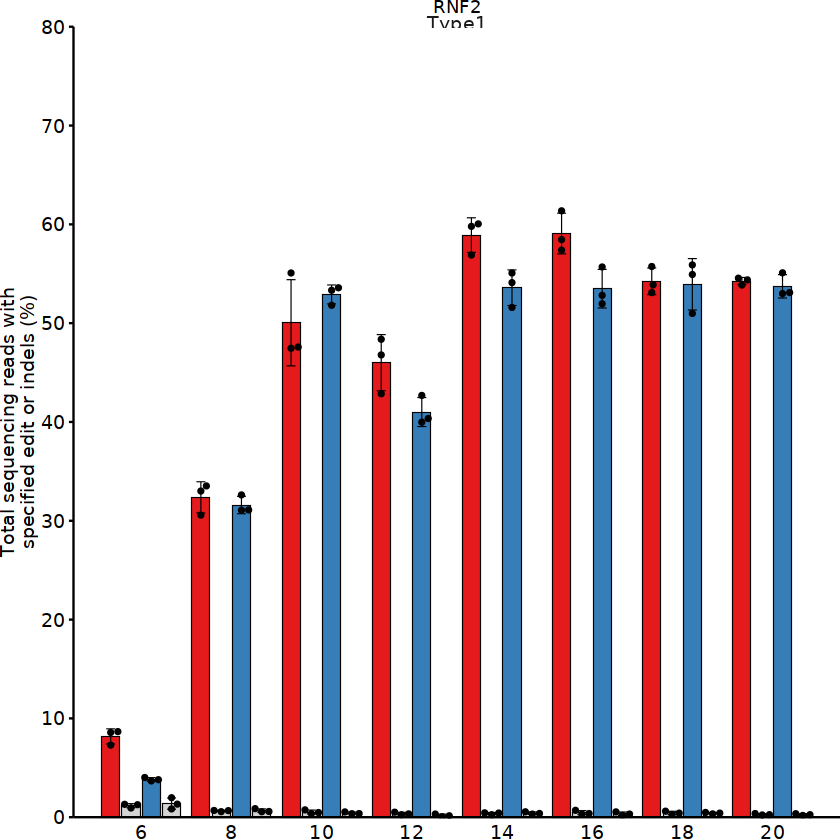

In [7]:
#pdf('plots/RT_optimization_Efficiency_RNF2.pdf', width = 2.65, height = 2.25, useDingbats = FALSE,bg = "transparent")
plot_results_by_type_one_locus(summary_all, "RNF2")  + 
    theme(legend.position = "none",plot.margin = margin(-0.25, 0, -0.2, 0, "in")
          , text = element_text(size = (11/.pt) * (11/3)), plot.title = element_text(vjust = -8)
          ,axis.title.x = element_text(hjust=-0.45, vjust = 6.5, size = rel(11/14))
          , strip.text.x = element_text(vjust = -4))
#dev.off()

In [17]:
mean(summary_all$Percent[summary_all$locus == "RNF2" & summary_all$HR == 14 & 
                         summary_all$Edit_Type == 'Correct_edit'])
mean(summary_all$Percent[summary_all$locus == "RNF2" & summary_all$HR == 14 & 
                         summary_all$Edit_Type == 'Correct_edit']) / 35.8859771386422

[1] 56.25051

[1] 1.567479

In [18]:
pdf('plots/RT_optimization_Efficiency_HEK3.pdf', width = 2.65, height = 2.25, useDingbats = FALSE,bg = "transparent")
plot_results_by_type_one_locus(summary_all[summary_all$type == "Type1",], "HEK3")  + 
    theme(legend.position = "none",plot.margin = margin(-0.25, 0, -0.2, 0, "in")
          , text = element_text(size = (11/.pt) * (11/3)), plot.title = element_text(vjust = -8)
          ,axis.title.x = element_text(hjust=-0.45, vjust = 6.5, size = rel(11/14))
          , strip.text.x = element_text(vjust = -4))
dev.off()

png 
  2

In [24]:
mean(summary_all$Percent[summary_all$locus == "HEK3" & summary_all$HR == 34 & 
                         summary_all$type == "Type1" &
                         summary_all$Edit_Type == 'Correct_edit'])

mean(summary_all$Percent[summary_all$locus == "HEK3" & summary_all$HR == 34 & 
                         summary_all$type == "Type1" &
                         summary_all$Edit_Type == 'Correct_edit']) /16.5047377095334

[1] 60.25592

[1] 3.650826

In [23]:
pdf('plots/RT_optimization_Efficiency_EMX1.pdf', width = 2.65, height = 2.25, useDingbats = FALSE
    ,bg = "transparent")
plot_results_by_type_one_locus(summary_all, "EMX1")  + 
    theme(legend.position = "none",plot.margin = margin(-0.25, 0, -0.2, 0, "in")
          , text = element_text(size = (11/.pt) * (11/3)), plot.title = element_text(vjust = -8)
          ,axis.title.x = element_text(hjust=-0.45, vjust = 6.5, size = rel(11/14))
          , strip.text.x = element_text(vjust = -4))
dev.off()

png 
  2

In [27]:
mean(summary_all$Percent[summary_all$locus == "EMX1" & summary_all$HR == 18 & 
                         summary_all$Edit_Type == 'Correct_edit'])
mean(summary_all$Percent[summary_all$locus == "EMX1" & summary_all$HR == 18 & 
                         summary_all$Edit_Type == 'Correct_edit']) / 18.2737146346362

[1] 65.67806

[1] 3.594128